In [1]:
!sshfs -o reconnect,ServerAliveInterval=120,ServerAliveCountMax=3 rennes.g5k:/srv/storage/empenn@storage2.rennes.grid5000.fr/private/ymerel /home/ymerel/storage

In [20]:
import os

datadir = os.path.join('data')
ds_path = os.path.join(datadir, 'normalized_dataset.csv')
corr_path = os.path.join(datadir, 'correlations.csv')
corr_func = 'spearman'
basedir = "/home/ymerel/storage/results/"
jobname = "auditory"
result_path = f"{basedir}{jobname}"

# Load data

In [21]:
import numpy as np
import pandas as pd

dataset = pd.read_csv(ds_path, delimiter=';')

print(f"{len(dataset)} configs in dataset")

correlations = pd.read_csv(corr_path, delimiter=';')
correlations = correlations.rename(columns={"correlation": "spearman"})

print(f"{len(correlations)} correlations in matrix")

matrix = correlations.pivot(index='source', columns='target', values=corr_func).fillna(1.0)

dataset.head(1010)

1001 configs in dataset
1004003 correlations in matrix


,slice_timing_correction/ref_slice/middle,signal_modeling/hrf/temporal_dispersion_derivs,coregistration/cost_function/mutual_information,signal_modeling/nuisance_regressors/comp_cor,signal_modelling/temporal_noise_autocorrelation/FAST,spatial_normalization/algorithm/DARTEL,spatial_normalization/interpolation/bspline,spatial_normalization/bias_regularisation,spatial_normalization/template/MNI152_linear,spatial_normalization/bias_regularisation/extremely_light,...,spatial_normalization/template/MNI305,spatial_normalization/bias_fwhm,spatial_normalization/bias_regularisation/very_light,coregistration/source_target/anat_on_func,slice_timing_correction/ref_slice/first,spatial_normalization/interpolation/nearest_neighbour,signal_modeling/hrf/canonical,id,spearman_from_ref,spearman_from_mean
0,False,True,True,False,False,False,False,False,False,0,...,False,0,0,True,False,True,False,0a3e49ee189809ec52afbdb3c3c5083f090dcb0d218326...,0.467386,0.533488
1,True,False,False,False,True,False,True,False,False,0,...,False,0,0,False,False,False,False,5c20760d37a8aa728efbbec6efc518da72c638cc88cdcd...,0.624349,0.671276
2,True,True,False,False,False,False,True,False,False,0,...,False,0,0,True,False,False,False,3097a7dc41788499cf25575641e12f92017eaec464039b...,0.054786,0.265940
3,False,True,False,False,False,False,False,False,False,0,...,False,0,0,True,True,True,False,bbb3beabd28e8a1d0f553be543e76a38246c1416fbfb00...,0.455374,0.584125
4,True,True,False,False,True,False,False,False,False,0,...,False,0,0,False,False,False,False,63bea197905677a189c165af71c8fc3933529cfb732832...,0.054786,0.265940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,False,False,False,False,False,False,False,False,False,0,...,False,0,0,False,True,False,False,91801a03dc14fd0a3028e8181828cd0d92bd12b830c86f...,0.123223,0.368549
997,False,False,False,False,True,False,False,False,False,0,...,False,0,0,True,False,True,False,ffcb718b2eaf9394c568665e65cb40e5b070ae63c2dd91...,0.070953,0.282691
998,False,False,False,False,False,False,True,False,False,0,...,False,0,0,True,False,False,False,c870f6446e080d90673cfac597ca16e081ea1b510ce78c...,0.138238,0.392617
999,True,True,False,False,True,False,True,False,False,0,...,False,0,0,True,False,False,False,315c85bdd9845ee4f5d15e689759ac1971849341a8b9b8...,0.588806,0.661417


# Compute dendogram, medoids and anti-medoids

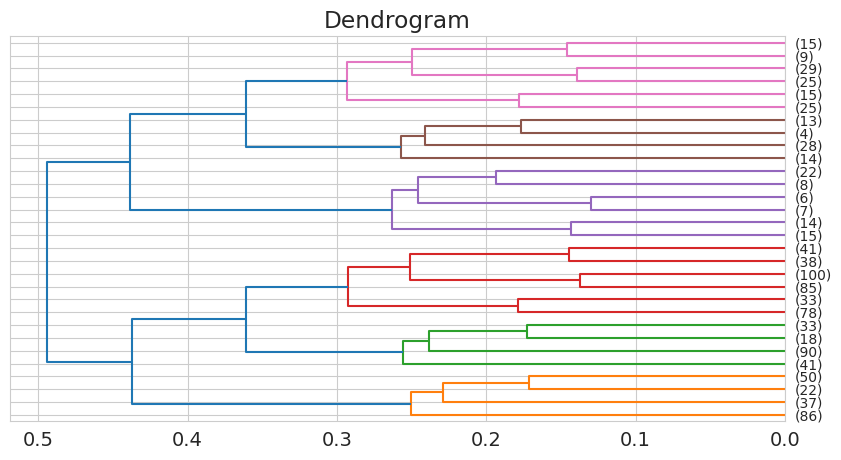

[18] clusters for t=0.2


In [22]:
from utils import clusterize_hierch, predict_clusters, get_cluster_distance_densities, get_cluster_cophenetic,get_cluster_silhouette, get_cluster_inertia, get_davies_bouldin, get_medoids, get_antimedoids
from plot_utils import plot_brain
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt

all_results = []

threshold = 0.20

# cluster on whole dataset
ds, distance_matrix, Z, clusters = clusterize_hierch(dataset, correlations, dataset['id'], None, corr_func, threshold)

plt.figure(figsize=(10, 5))
dendrogram(Z, truncate_mode='lastp', distance_sort=True, orientation='left')
plt.title('Dendrogram')
plt.show()

medoids = get_medoids(distance_matrix, clusters)
# sort by cluster label
medoids = {k: medoids[k] for k in sorted(medoids.keys())} 
antimedoids = get_antimedoids(distance_matrix, clusters)

print(f'[{len(medoids.items())}] clusters for t={threshold}')

# Plot clusters (medoids, antimedoids)

Cluster [1] - Correlation to ref [0.7344086517957163] - Medoid [4f5eb6d8b09a8cd0683a744c1ebec9cec4da06711d13d2852b90eda87e539ca2]


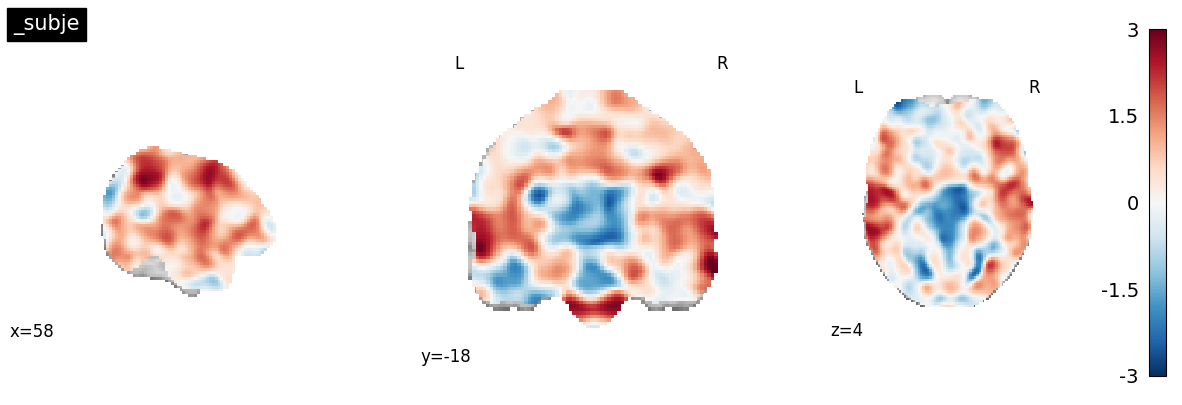

Cluster [1] - Antimedoid


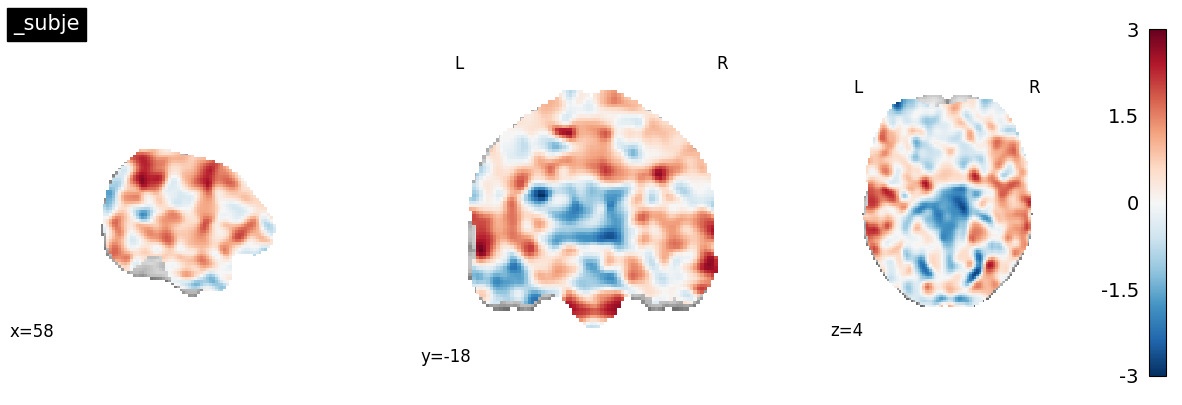

Cluster [2] - Correlation to ref [1.0] - Medoid [d674f16513ec0a7f29bac9cb3673cd3a8a8ea02e80b390d52c6418d68a6ea036]


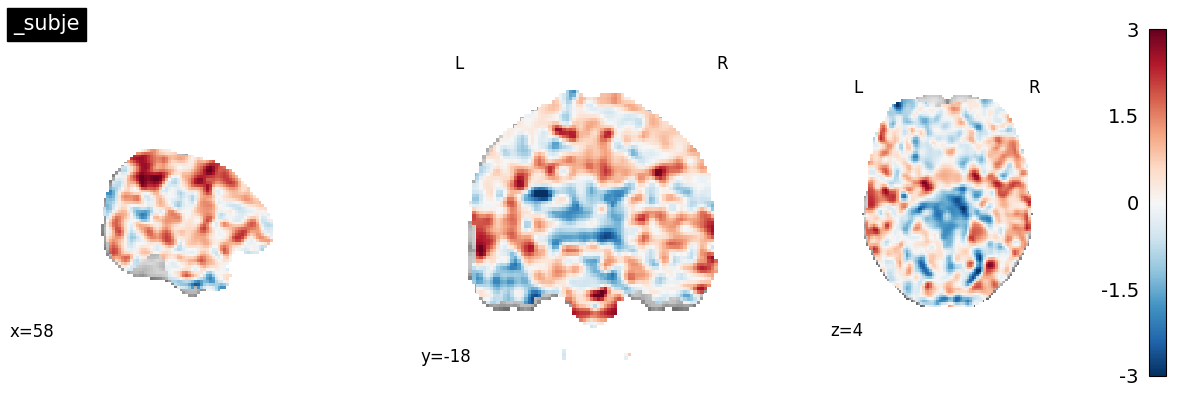

Cluster [2] - Antimedoid


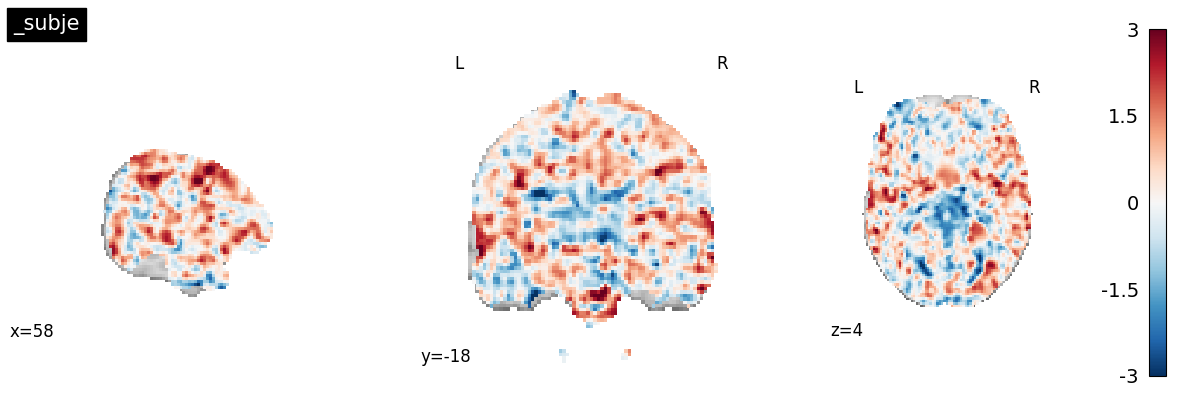

Cluster [3] - Correlation to ref [0.5836242004309254] - Medoid [2546a79cd3a8fea19ab031a6ed8409e8337274efdea591c27076902c1d3d11a0]


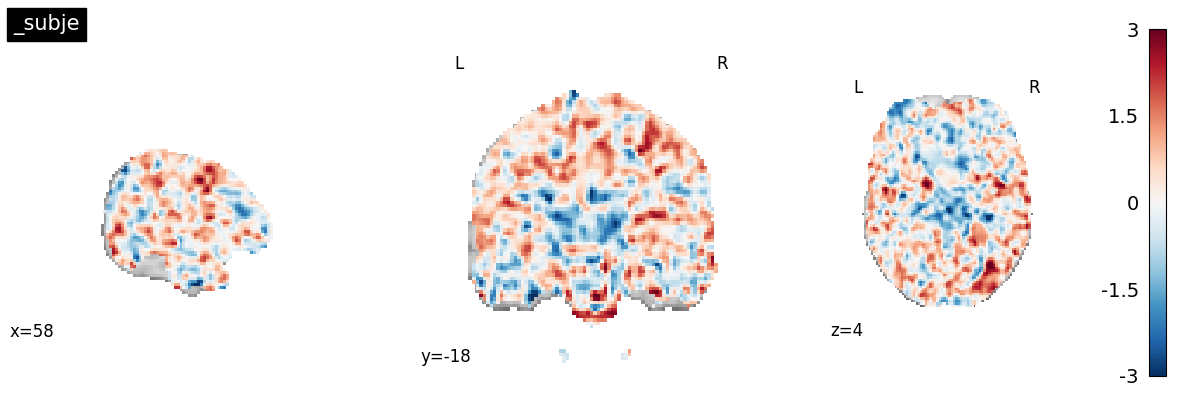

Cluster [3] - Antimedoid


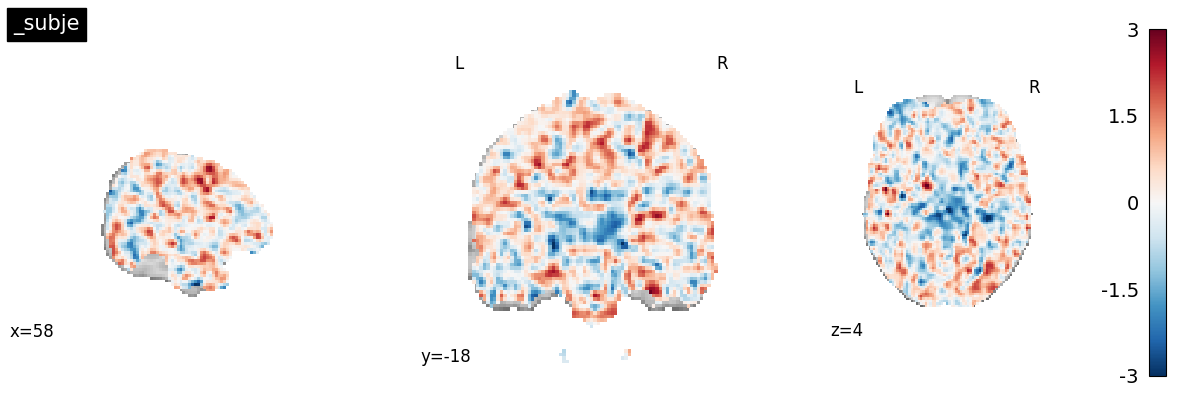

Cluster [4] - Correlation to ref [0.5335265357892683] - Medoid [1a9b66ca62b707f3b1a8ec1d0c339ab513ab0f3911bd5d02f2f8d75623c1d1dc]


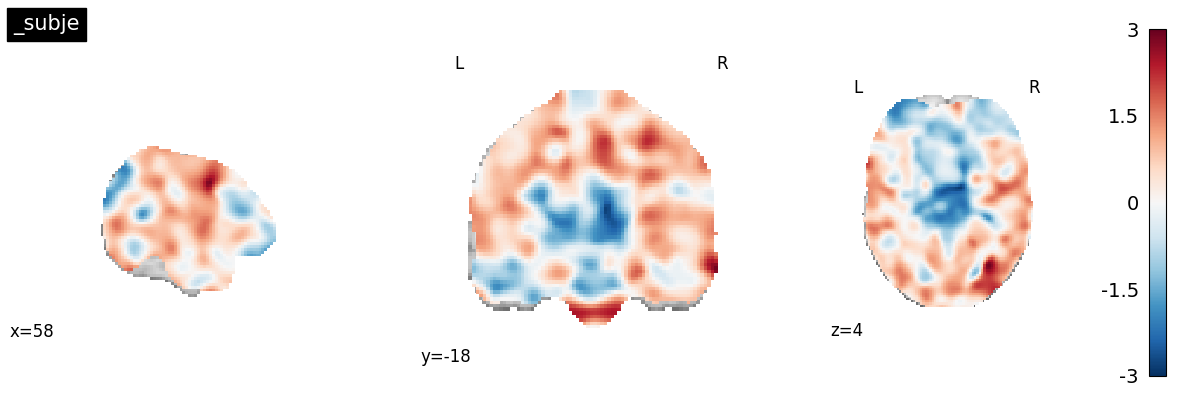

Cluster [4] - Antimedoid


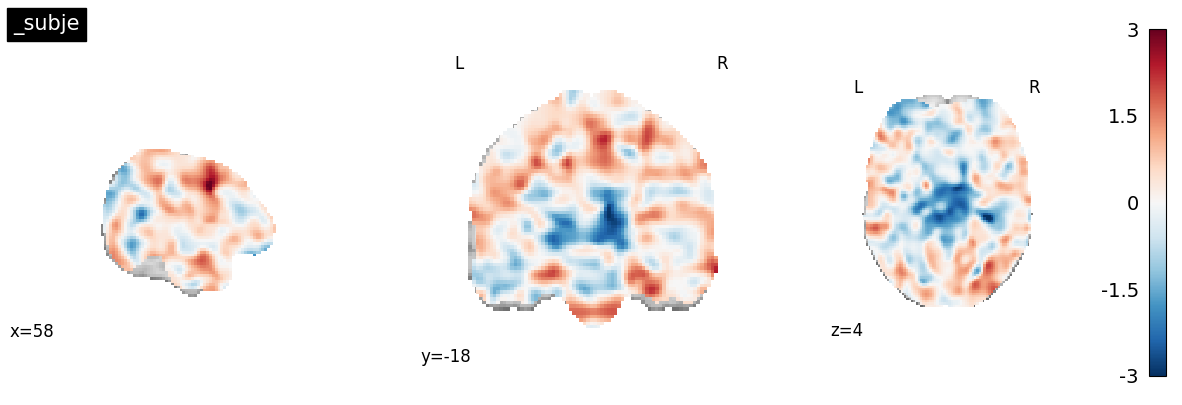

Cluster [5] - Correlation to ref [0.6468371098425694] - Medoid [58207591da871391c4f17f28215d8d1e94fef443623466d10d6dee1c628e3e24]


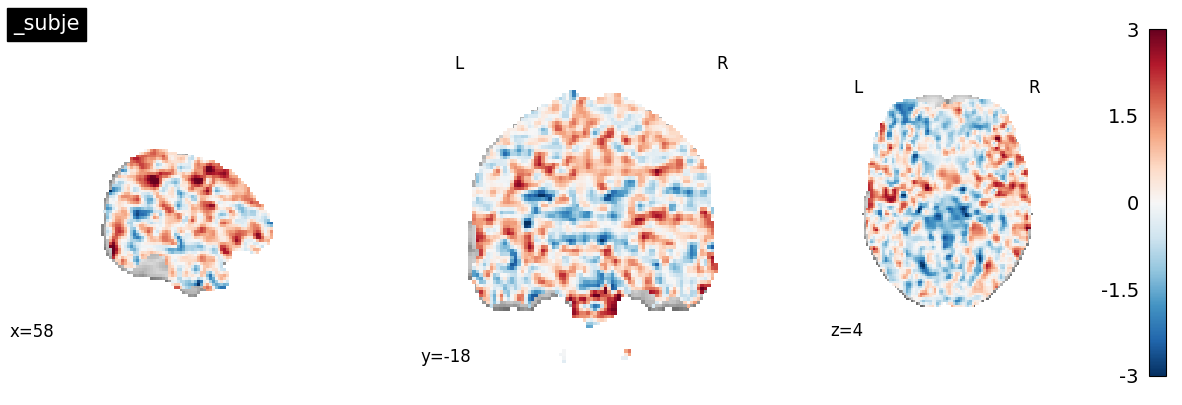

Cluster [5] - Antimedoid


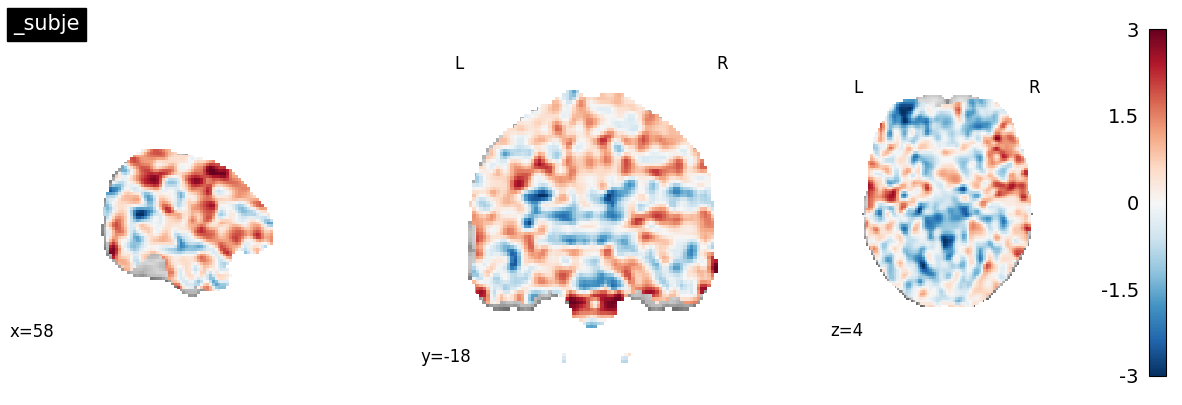

Cluster [6] - Correlation to ref [0.5308163999932807] - Medoid [4531f6094a69641eb0e96211c76a26dca0b7072e60e0113cc25f607988260ce0]


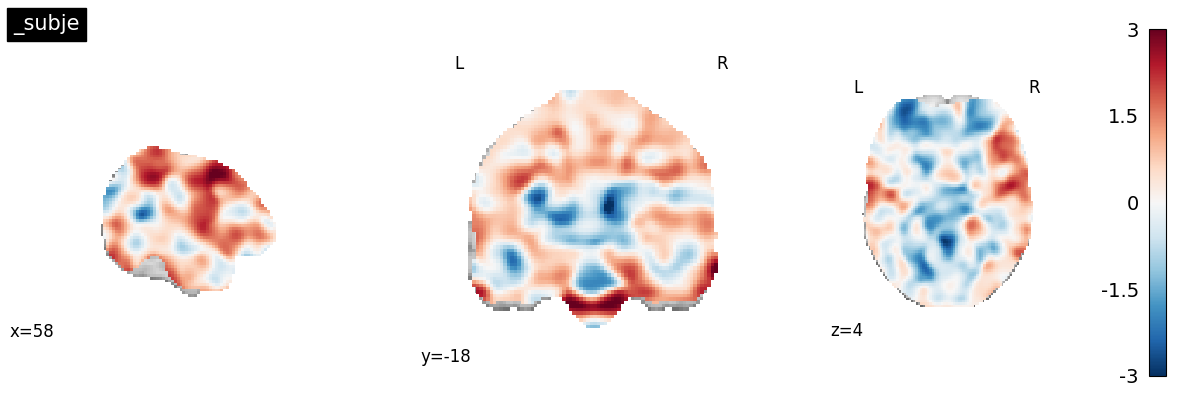

Cluster [6] - Antimedoid


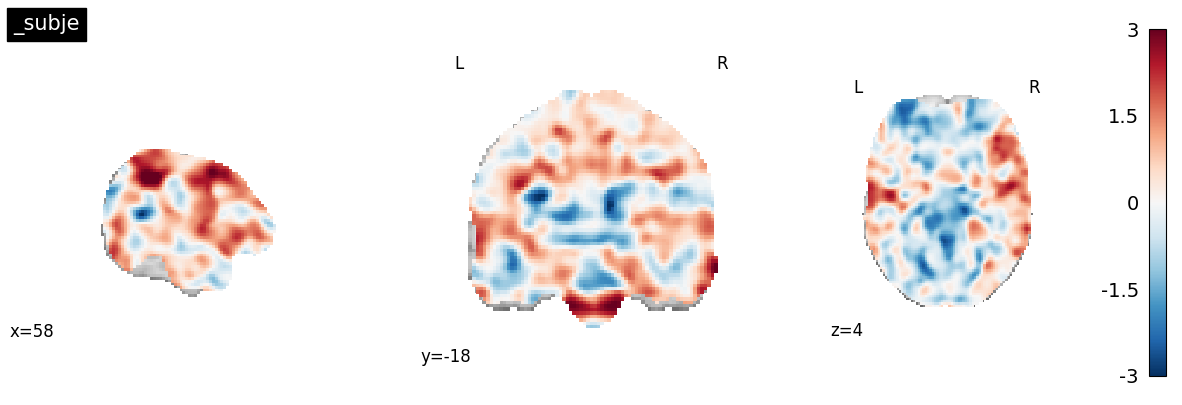

Cluster [7] - Correlation to ref [0.6190773230968324] - Medoid [e58e102af8790dd040b53bc4aba2237d3f388d0bb8c353140896ab208a82136e]


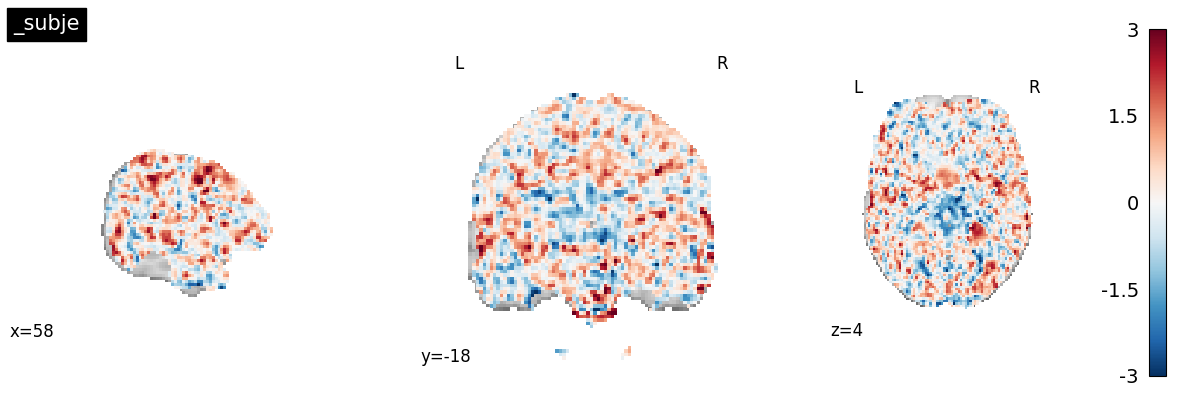

Cluster [7] - Antimedoid


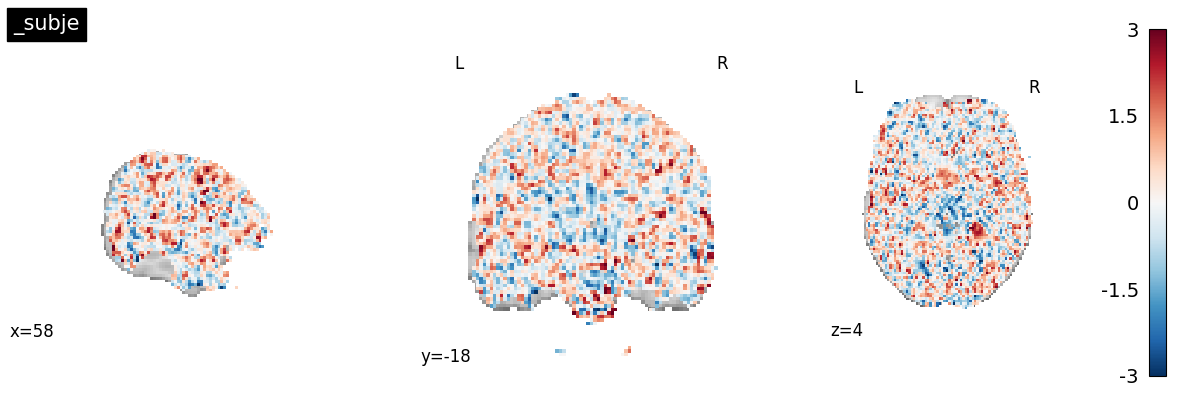

Cluster [8] - Correlation to ref [0.4596696908150116] - Medoid [edfd11f6d906c6aad86398f5660eb0738f686d4029f601c89a0b9fe3a84a61b1]


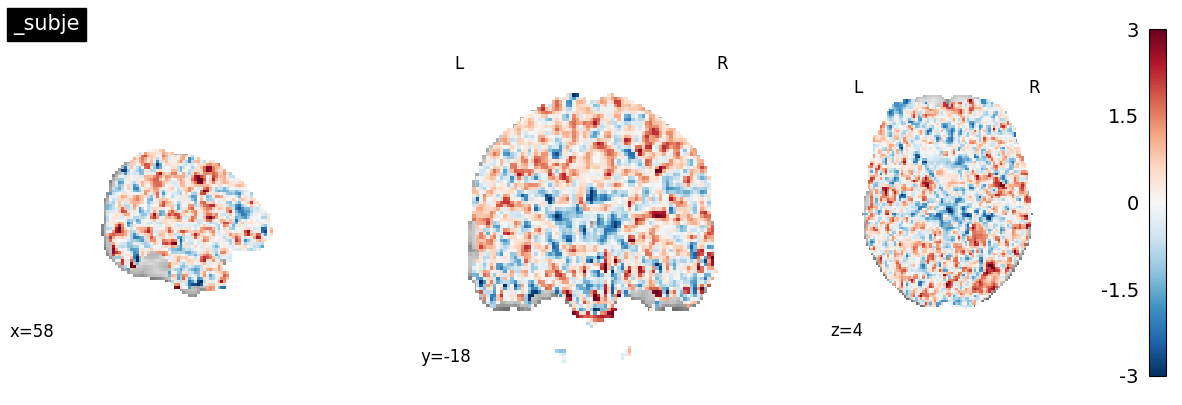

Cluster [8] - Antimedoid


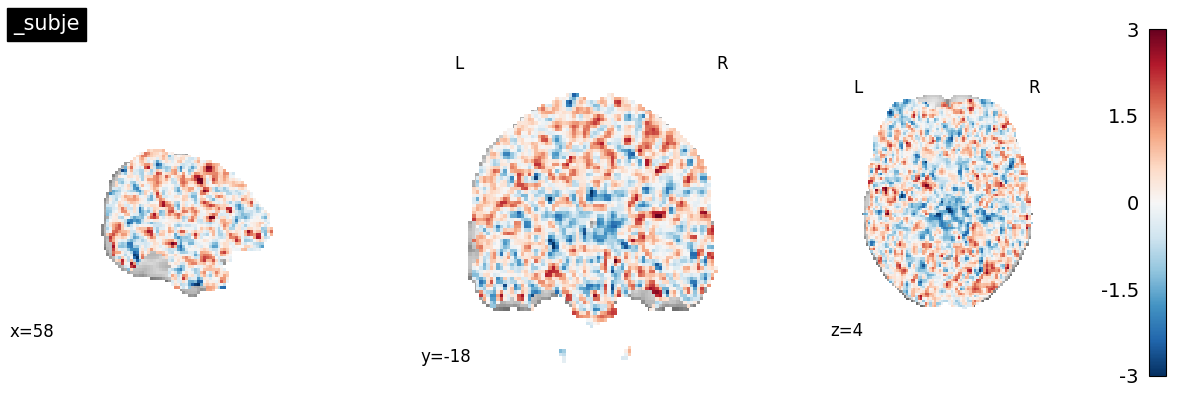

Cluster [9] - Correlation to ref [0.3152958665974717] - Medoid [15ec17a69317f8b39681cd00898f999dd0f521d52fcc48d1889191e77f1c3379]


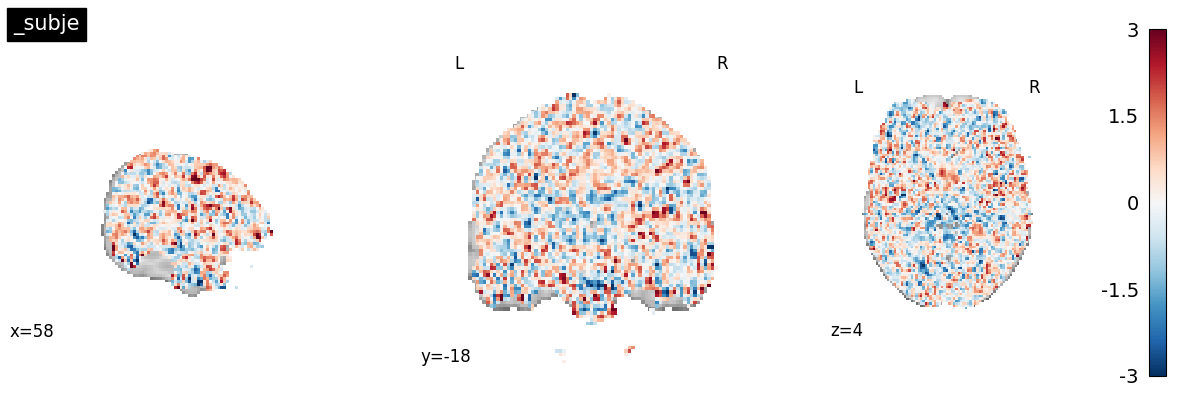

Cluster [9] - Antimedoid


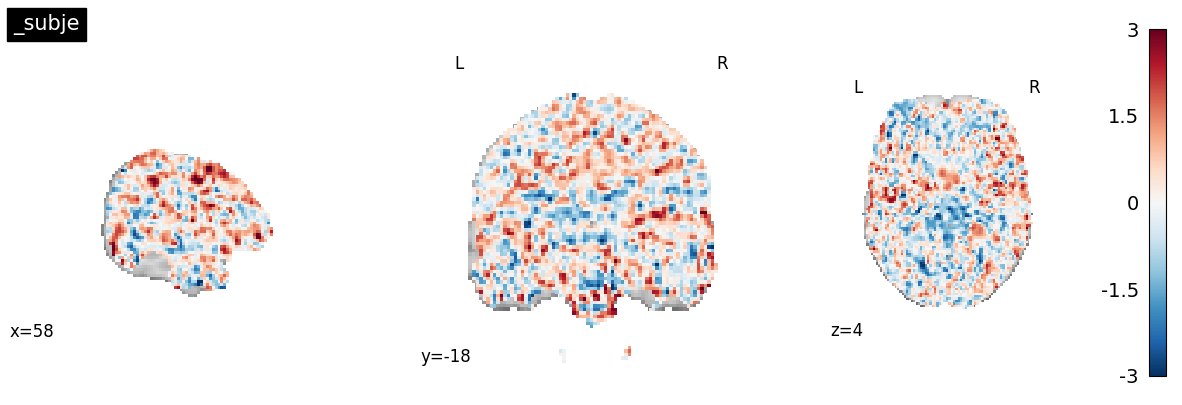

Cluster [10] - Correlation to ref [0.1805413500593995] - Medoid [ce0eea955f85a86a18c57961e6cefd81d22bcdae36ff6a30327665a1a4298152]


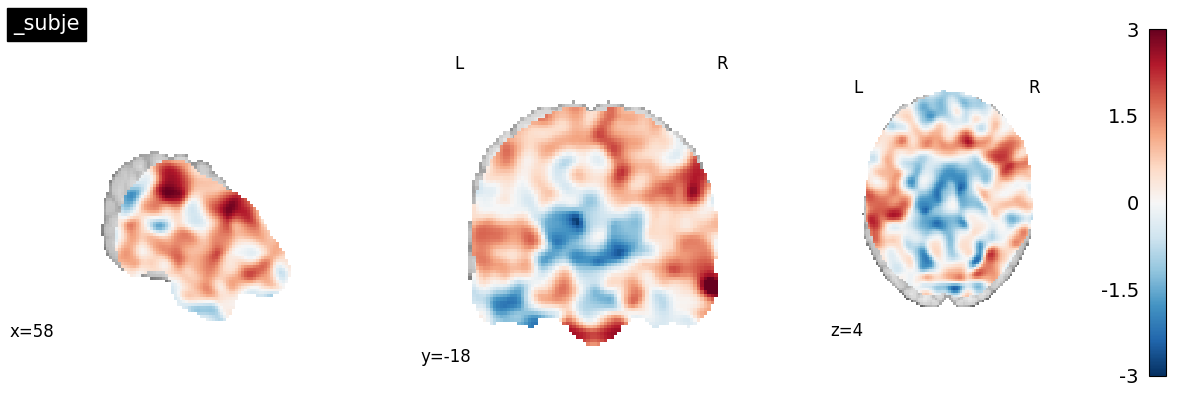

Cluster [10] - Antimedoid


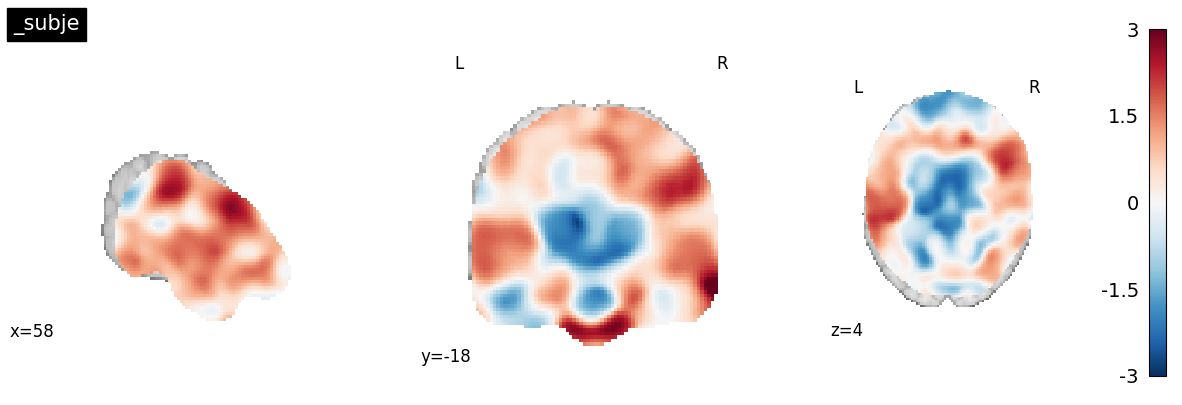

Cluster [11] - Correlation to ref [0.1436290283514446] - Medoid [110034f6cc6f9c04eca86b1491f0a344107c109db4740792936dd19abdd8e164]


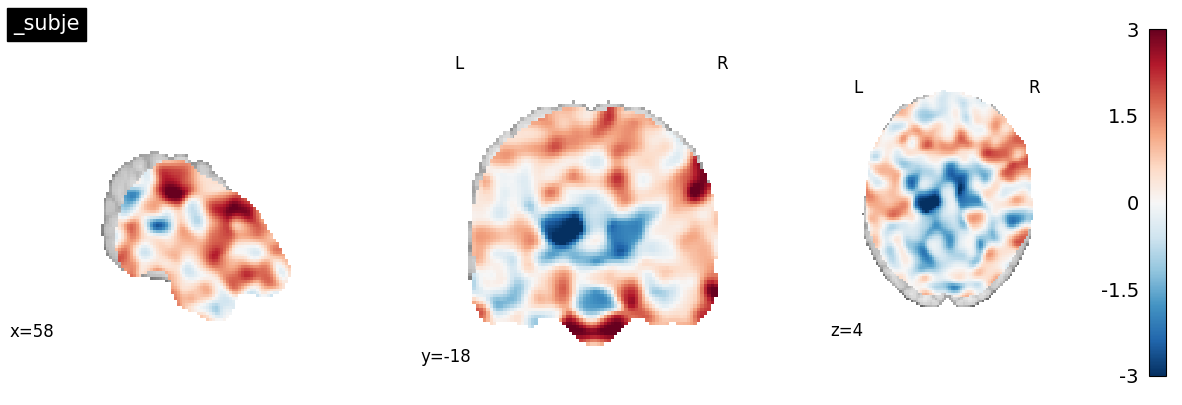

Cluster [11] - Antimedoid


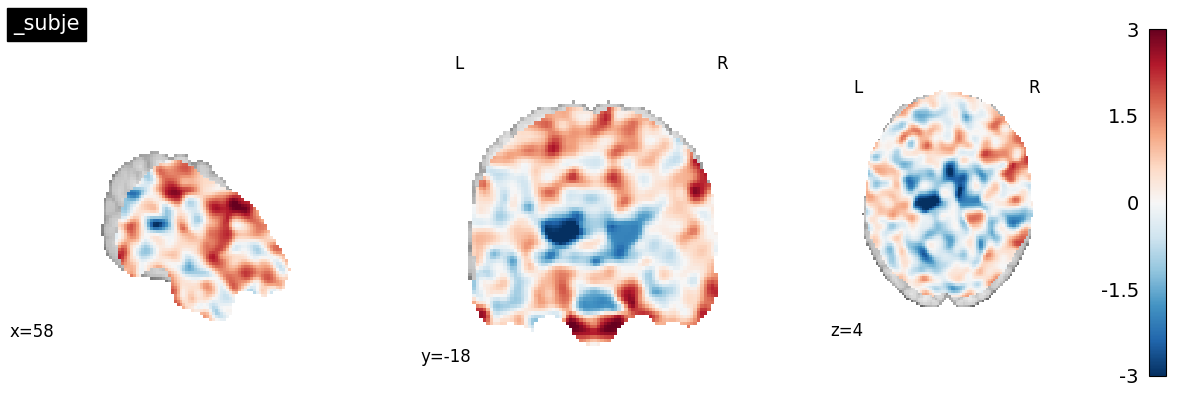

Cluster [12] - Correlation to ref [0.1349284547302525] - Medoid [9e8200ed9e5c43f4a28002c19d429cb001e69a9a992b6afcd4bc6d61a59ae598]


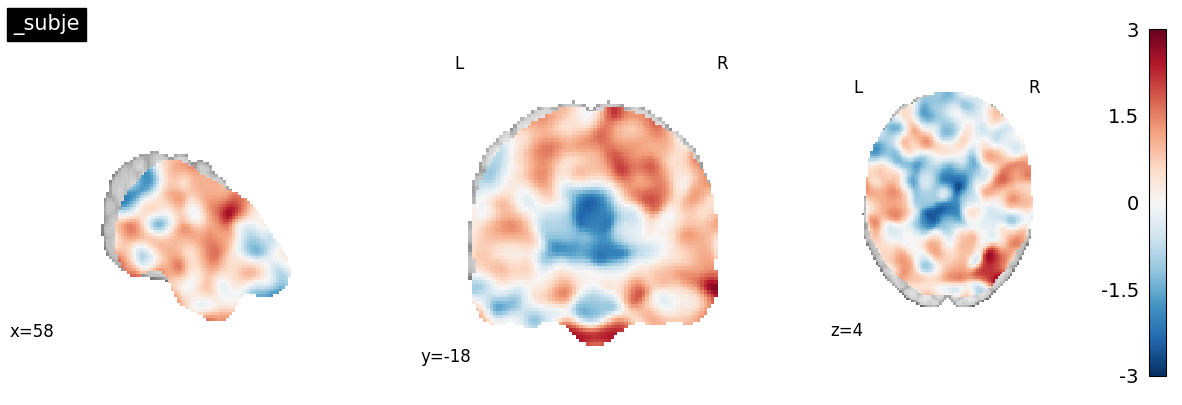

Cluster [12] - Antimedoid


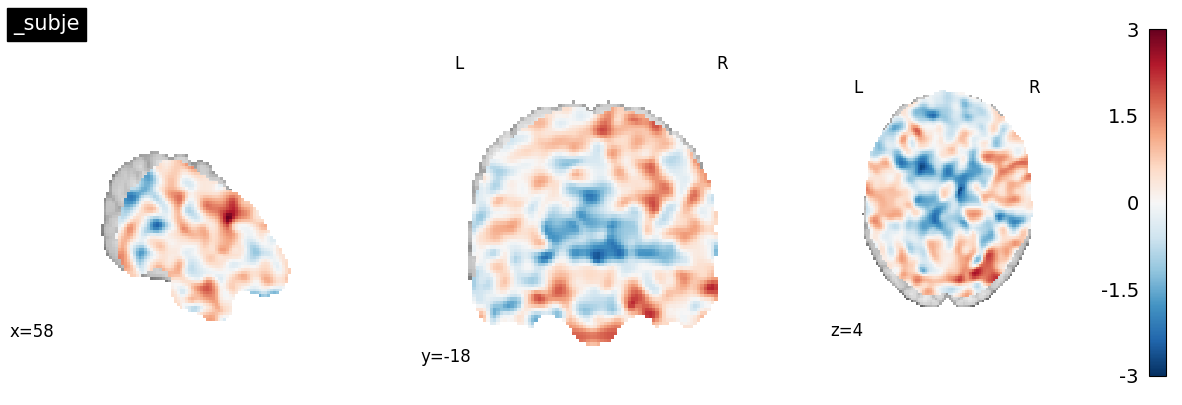

Cluster [13] - Correlation to ref [0.1085857120873795] - Medoid [fb9ba3f0987a61728151dd1a2ae12accf3b5a17808a6d8be5fea639d709e8f64]


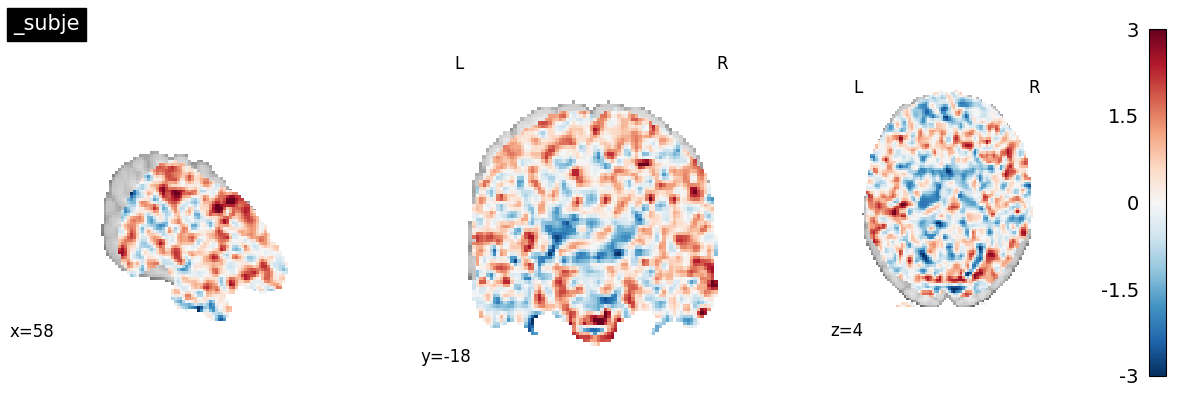

Cluster [13] - Antimedoid


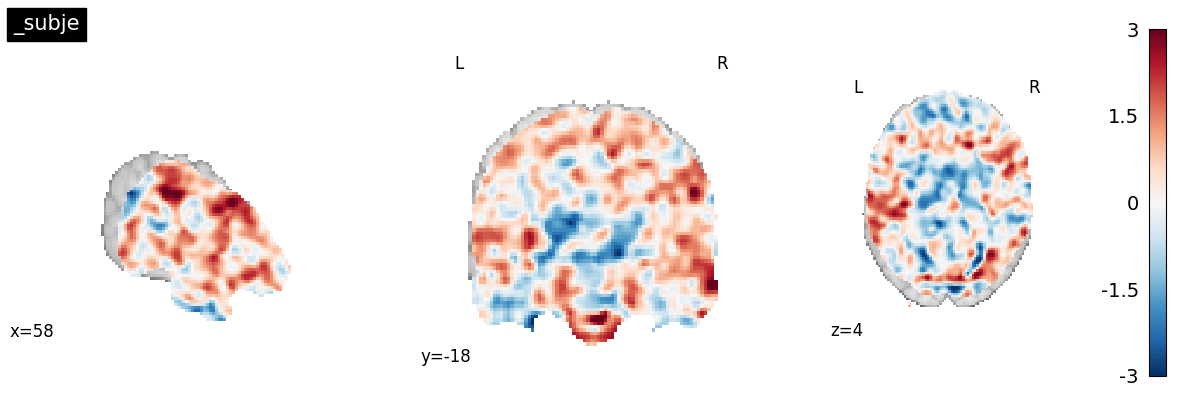

Cluster [14] - Correlation to ref [0.1025608478614502] - Medoid [1c9b7f59bbfa56555b1f23a2cf438d6bfc4ce7744699ef641e1525ac4e9a316a]


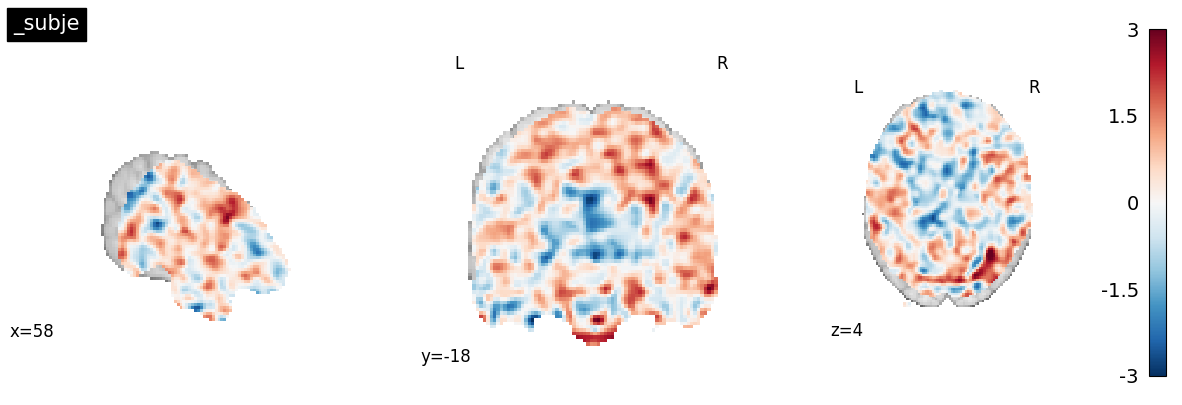

Cluster [14] - Antimedoid


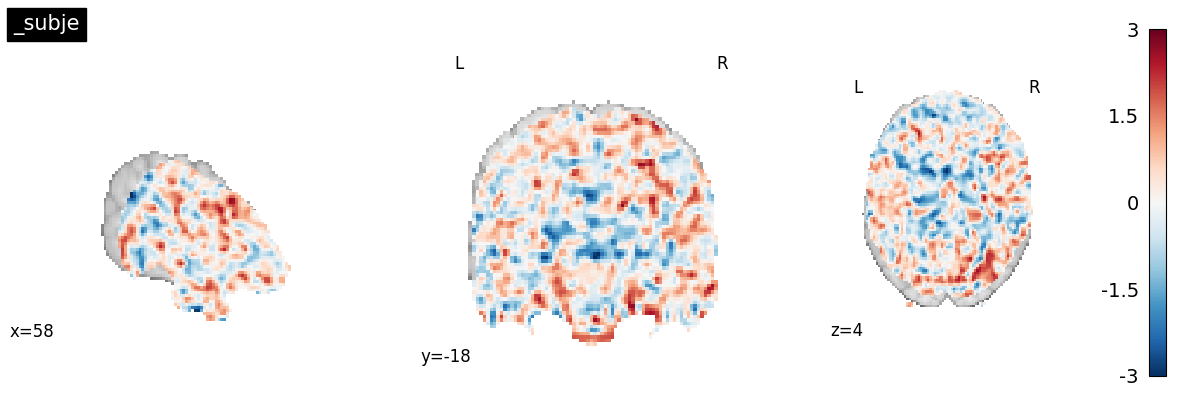

Cluster [15] - Correlation to ref [0.0893177701740174] - Medoid [3083d731d112d47fbd4f461ad74425447c054551146ac80beb7fa1235da0e55d]


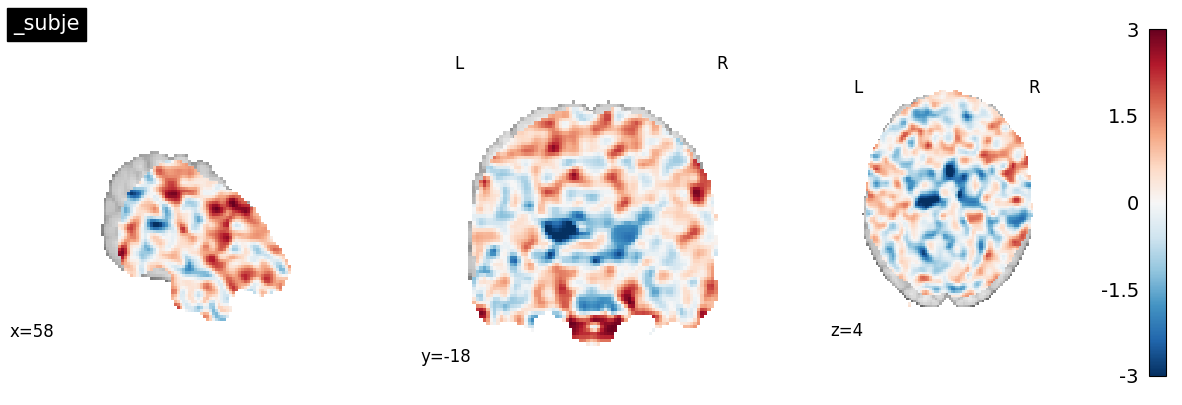

Cluster [15] - Antimedoid


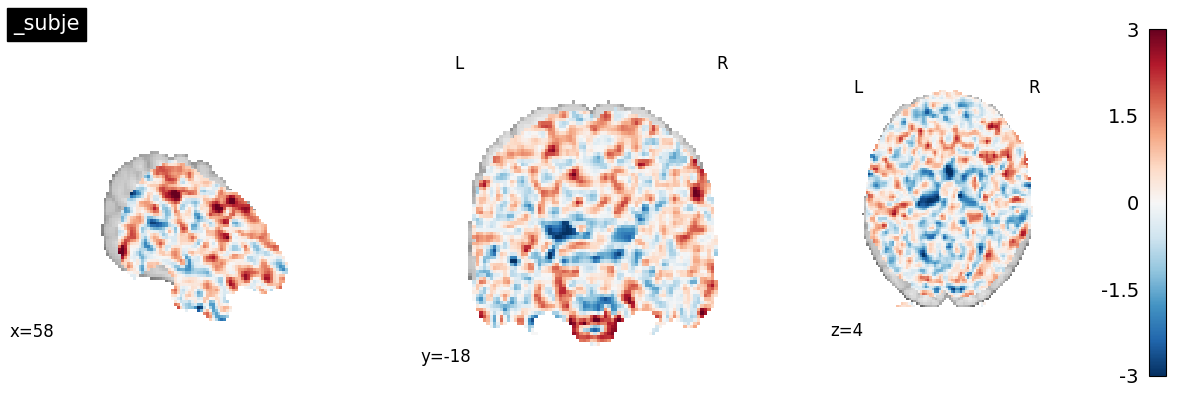

Cluster [16] - Correlation to ref [0.0711055960707775] - Medoid [189812476a49e80a2927d98aa539fb681716523920060a165eb2ab0a6d69ca1a]


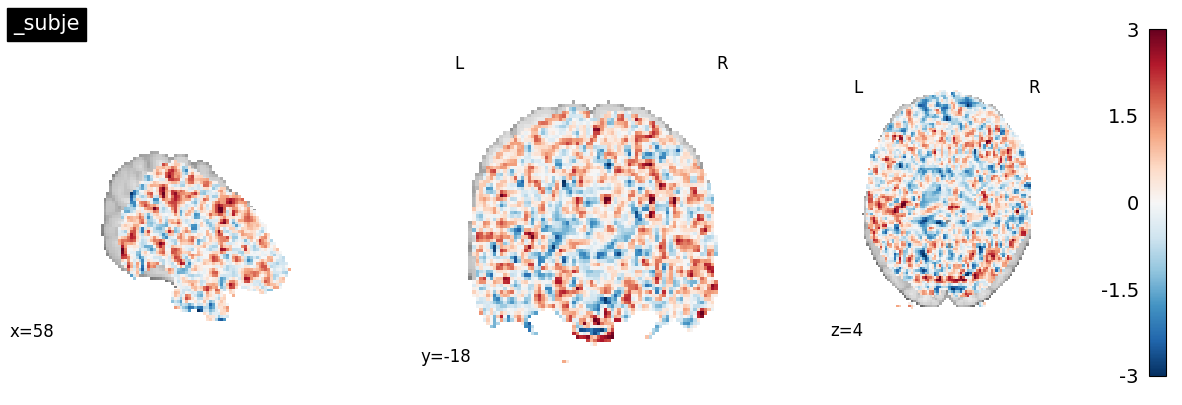

Cluster [16] - Antimedoid


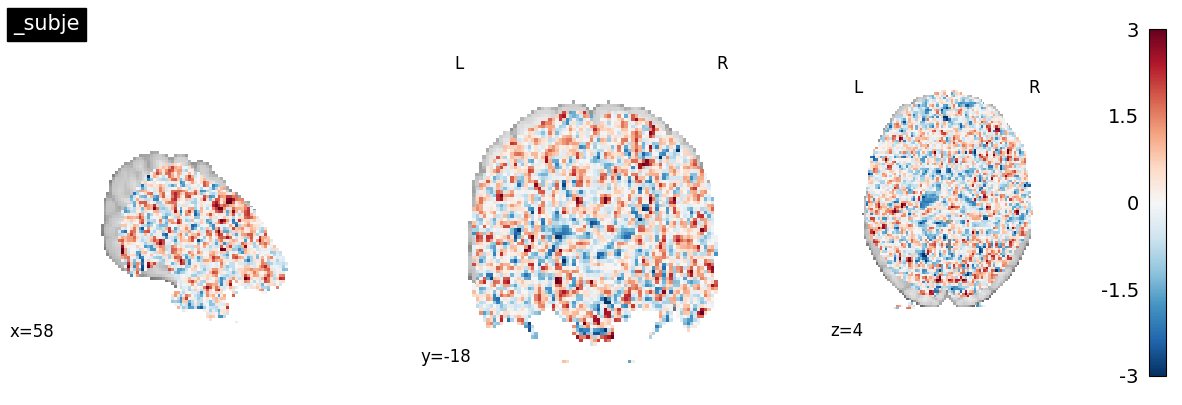

Cluster [17] - Correlation to ref [0.0547856976606978] - Medoid [3097a7dc41788499cf25575641e12f92017eaec464039b29b876fd778c26225e]


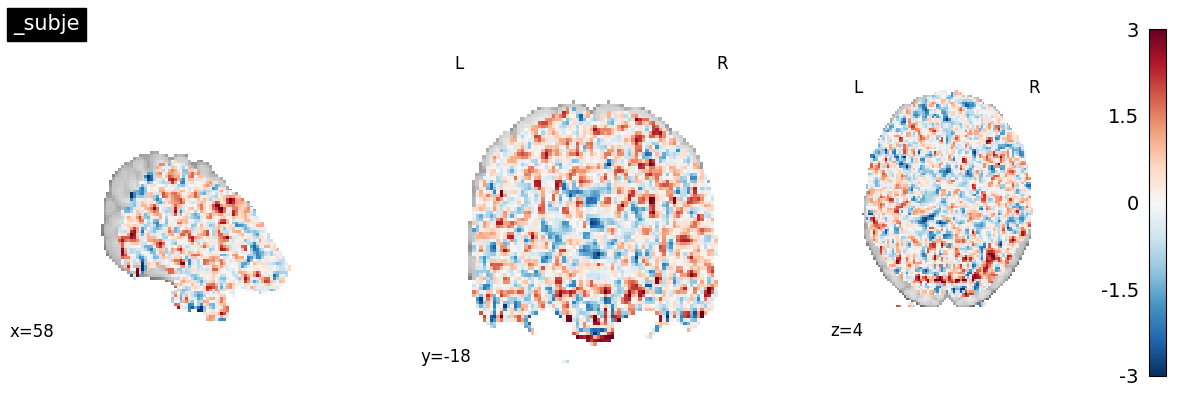

Cluster [17] - Antimedoid


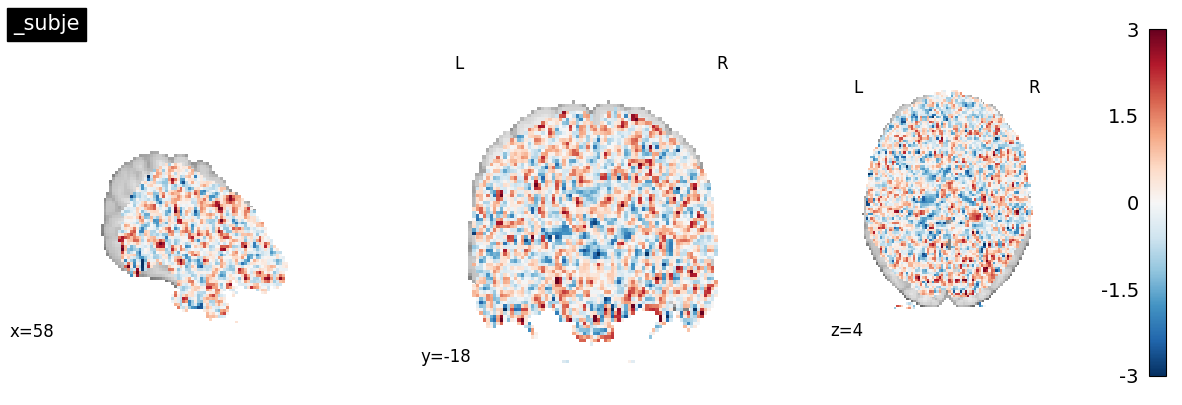

Cluster [18] - Correlation to ref [0.0482191135690264] - Medoid [41fc9bcbc13100e4140547fc2a078b926ce9a14e5d148a12ae5fd80a6ffaf7b9]


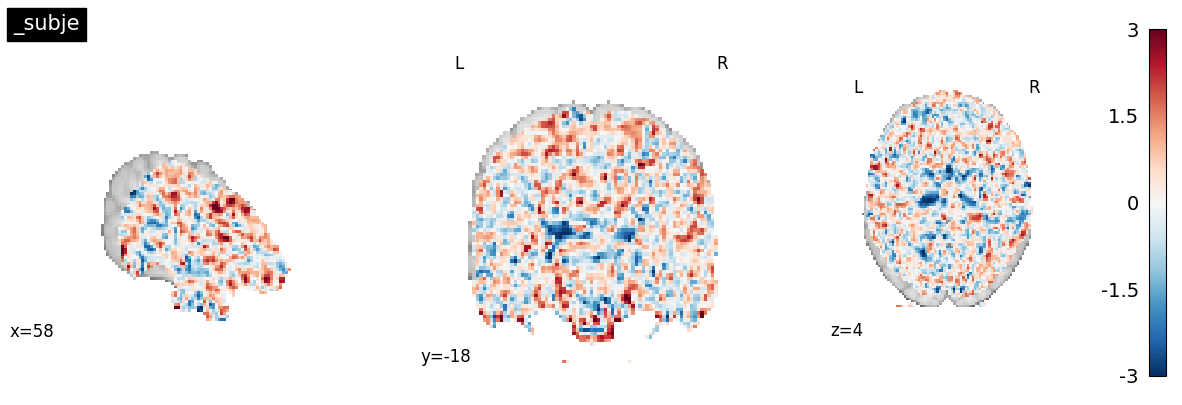

Cluster [18] - Antimedoid


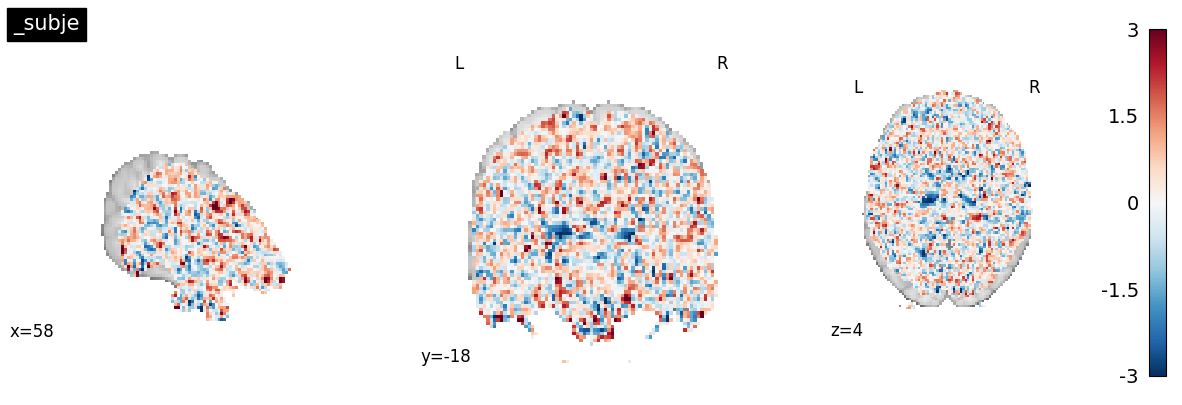

In [23]:
coords = [58, -18, 4]
for key, value in medoids.items():
    print(f"Cluster [{key}] - Correlation to ref [{dataset.loc[dataset['id'] == value, f'{corr_func}_from_ref'].values[0]}] - Medoid [{value}]")
    img_path = os.path.join(result_path, value, '_subject_id_01', 'result.nii')
    plot_brain(img_path, None, coords)
    print(f"Cluster [{key}] - Antimedoid")
    img_path = os.path.join(result_path, antimedoids[key], '_subject_id_01', 'result.nii')
    plot_brain(img_path, None, coords)

# Define Valid / Invalid clusters

In [24]:
all_clusters = clusters.unique().tolist()
valid_clusters = [1, 2, 3, 4, 5, 6, 7, 8, 9]
invalid_clusters = [10, 11, 12, 13, 14, 15, 16, 17, 18]
print(f"Valid clusters: {len(valid_clusters)}/{len(all_clusters)}")
print(f"Invalid clusters: {len(invalid_clusters)}/{len(all_clusters)}")

Valid clusters: 9/18
Invalid clusters: 9/18


In [25]:
print(f"Excludes {len(invalid_clusters)} clusters")

valid_ds = ds[~ds['cluster'].isin(invalid_clusters)]
valid_ds.to_csv(os.path.join(datadir, f'valid_dataset.csv'), index=False, sep=';')
print(f"Valids : {len(valid_ds)}")

invalid_ds = ds[ds['cluster'].isin(invalid_clusters)]
invalid_ds.to_csv(os.path.join(datadir, f'invalid_dataset.csv'), index=False,sep=';') 
print(f"Invalids : {len(invalid_ds)}")

Excludes 9 clusters
Valids : 752
Invalids : 249


# Plot clusters by distance from reference / mean result

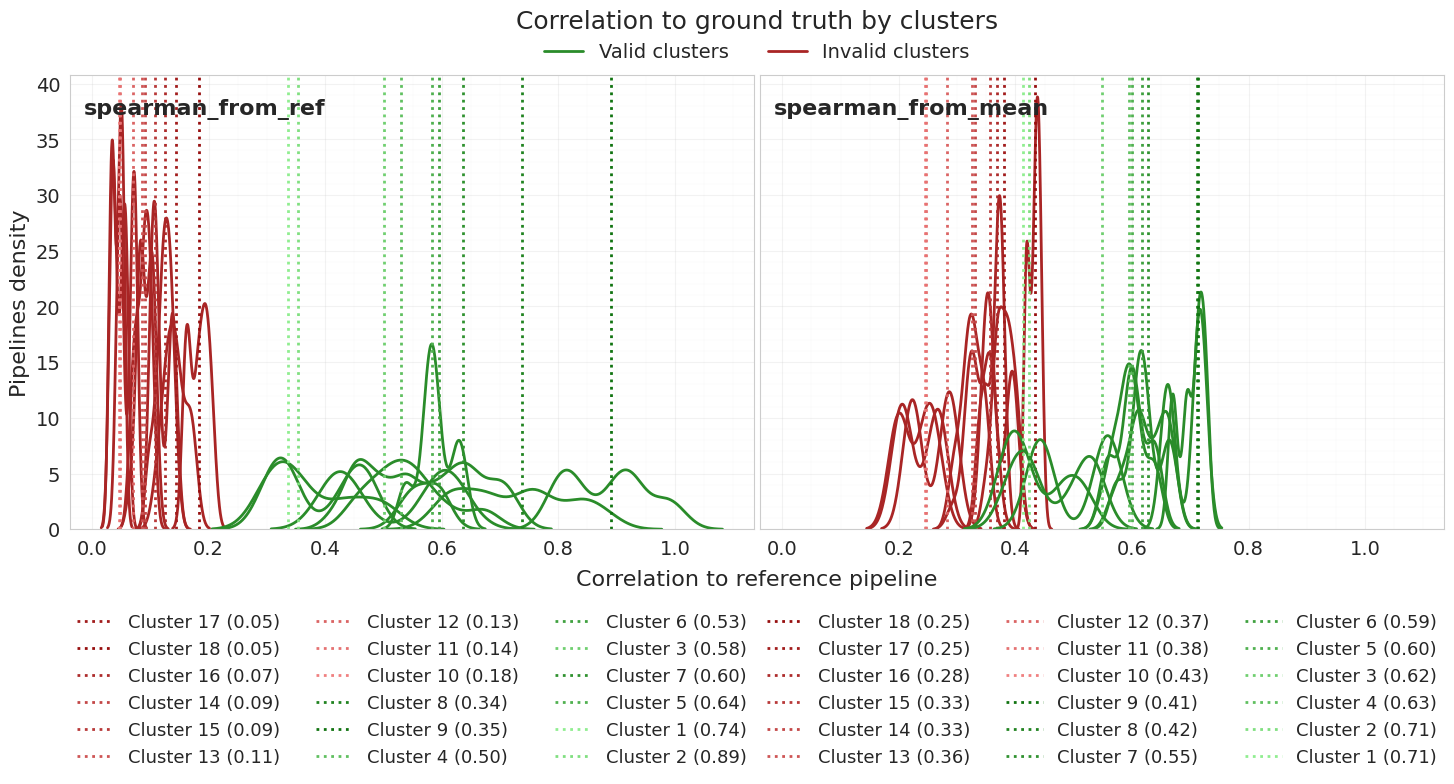

In [26]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from matplotlib.colors import LinearSegmentedColormap
import os

# Define the tasks and their respective directories
truths = [f'{corr_func}_from_ref', f'{corr_func}_from_mean']

# Create a figure with two subplots side by side, increased width and height
fig, axes = plt.subplots(1, 2, figsize=(16, 8), sharey=True, sharex=True)
fig.suptitle('Correlation to ground truth by clusters', fontsize=18, y=0.85)

# Define colormaps for green and red shades
green_cmap = LinearSegmentedColormap.from_list('green_shades', ['lightgreen', 'darkgreen'], N=100)
red_cmap = LinearSegmentedColormap.from_list('red_shades', ['lightcoral', 'darkred'], N=100)

plt.rcParams.update({'font.size': 14})

# Use the same shades for the legend as in the plots
valid_shade = green_cmap(0.7)
invalid_shade = red_cmap(0.7)

# Create a single legend for Valid/Invalid (no cluster count)
legend_handles = [
    plt.Line2D([0], [0], color=valid_shade, lw=2, label='Valid clusters'),
    plt.Line2D([0], [0], color=invalid_shade, lw=2, label='Invalid clusters')
]
fig.legend(handles=legend_handles, loc='upper center',
           ncol=2, frameon=False, fontsize=14,
           bbox_to_anchor=(0.5, 0.83))

i = 0
for truth in truths:
    datasets = {
        'Valid': pd.read_csv(os.path.join(datadir, 'valid_dataset.csv'), delimiter=';'),
        'Invalid': pd.read_csv(os.path.join(datadir, 'invalid_dataset.csv'), delimiter=';')
    }

    # Dictionary to store stats and medoids
    stats = {}
    medoids = {}

    # Calculate stats and find medoids for each dataset
    for label, df in datasets.items():
        stats[label] = {'mean': df[truth].mean()}
        cluster_medoids = {}
        for cluster in sorted(df['cluster'].unique()):
            cluster_data = df[df['cluster'] == cluster][truth].values.reshape(-1, 1)
            distances = cdist(cluster_data, cluster_data)
            medoid_idx = np.argmin(distances.sum(axis=1))
            cluster_medoids[int(cluster)] = cluster_data[medoid_idx][0]
        medoids[label] = cluster_medoids

    # Custom legend handles for medoids (to be placed under each subplot)
    medoid_legend_handles = []

    # Plot Invalid and Valid for the current truth
    for label in ['Invalid', 'Valid']:
        df = datasets[label]
        cmap = green_cmap if label == 'Valid' else red_cmap

        cluster_color = valid_shade if label == 'Valid' else invalid_shade

        for cluster in sorted(df['cluster'].unique()):
            cluster_data = df[df['cluster'] == cluster]
            sb.kdeplot(
                cluster_data[truth],
                color=cluster_color,
                linewidth=2,
                ax=axes[i]
            )

        # Plot medoids for each cluster (colored to match cluster)
        sorted_medoids = sorted(medoids[label].items(), key=lambda x: x[1])
        for j, (cluster, medoid) in enumerate(sorted_medoids):
            medoid_color = cmap(j / len(sorted_medoids))  # Distinct shade for medoids
            axes[i].axvline(medoid, color=medoid_color, linestyle=':', linewidth=2)

        # Add medoid entries to the legend handles
        for cluster, medoid in sorted_medoids:
            medoid_color = cmap(list(medoids[label].keys()).index(cluster) / len(medoids[label]))
            medoid_legend_handles.append(plt.Line2D([0], [0],
                color=medoid_color,
                linestyle=':', lw=2, label=f'Cluster {cluster} ({medoid:.2f})'))

    # Add task name in the top left or top right of each subplot
    axes[i].text(0.02, 0.95, f'{truth}',
                     transform=axes[i].transAxes,
                     fontsize=16, fontweight='bold',
                     verticalalignment='top')

    axes[i].grid(True)

    # Add medoids legend under each subplot
    if len(medoid_legend_handles) == 4:
        cols = 2
    else:
        cols = 3

    axes[i].legend(handles=medoid_legend_handles, loc='upper center',
                   bbox_to_anchor=(0.5, -0.15), ncol=cols, frameon=False, fontsize=13)
    i += 1

# Set y-label only for the left subplot
axes[0].set_ylabel('Pipelines density', fontsize=16)

# Remove x-axis labels for both subplots
for ax in axes:
    ax.set_xlabel('')

    # Major grid
    ax.grid(True, which='major', linestyle='-', linewidth=0.75, alpha=0.25)

    # Minor ticks and grid
    ax.minorticks_on()
    ax.grid(True, which='minor', linestyle='-', linewidth=0.25, alpha=0.15)

    ax.set_axisbelow(True)  # Ensure grid is below data

# Add a single x-axis label centered below both subplots
fig.text(0.5, 0.13, 'Correlation to reference pipeline', ha='center', fontsize=16)

# Adjust layout to maximize plot width and prevent legend clipping
plt.tight_layout(rect=[0.02, 0.05, 0.98, 0.85])
plt.subplots_adjust(wspace=0.01, bottom=0.2)
plt.savefig("corr_to_ref.svg")
plt.show()


{'min': np.float64(0.3060601906134751), 'max': np.float64(1.0), 'mean': np.float64(0.6069998298619662)}
{'min': np.float64(0.0318388137375781), 'max': np.float64(0.2098155602005783), 'mean': np.float64(0.11262777297978205)}


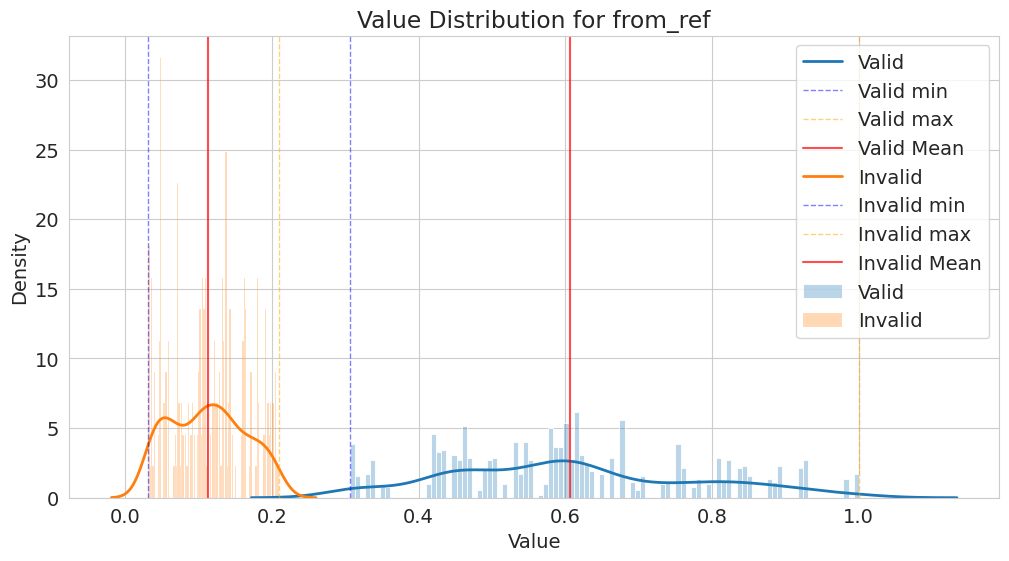

In [27]:
import seaborn as sb
# Create a dictionary to loop over the datasets
datasets = {
    'Valid': valid_ds,
    'Invalid': invalid_ds
}

# Calculate min, max, and mean for each dataset
stats = {}
for label, df in datasets.items():
    stats[label] = {
        'min': df[f'{corr_func}_from_ref'].min(),
        'max': df[f'{corr_func}_from_ref'].max(),
        'mean': df[f'{corr_func}_from_ref'].mean()
    }
    print(stats[label])

# Plot
plt.figure(figsize=(12, 6))
for label, df in datasets.items():
    sb.histplot(
        df[f'{corr_func}_from_ref'],
        bins=100,
        alpha=0.3,
        label=label,
        kde=False,
        stat='density'
    )
    sb.kdeplot(
        df[f'{corr_func}_from_ref'],
        label=label,
        linewidth=2
    )
    # Add vertical lines for min, max, and mean
    plt.axvline(stats[label]['min'], color='blue', linestyle='--', alpha=0.5, linewidth=1, label=f'{label} min')
    plt.axvline(stats[label]['max'], color='orange', linestyle='--', alpha=0.5, linewidth=1, label=f'{label} max')
    plt.axvline(stats[label]['mean'], color='red', linestyle='-', alpha=0.7, linewidth=1.5, label=f'{label} Mean')

plt.title('Value Distribution for from_ref')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

{'min': np.float64(0.3861551077951163), 'max': np.float64(0.728472382381488), 'mean': np.float64(0.6092037266099952)}
{'min': np.float64(0.1938394880055216), 'max': np.float64(0.4492606325231339), 'mean': np.float64(0.3415541997686469)}


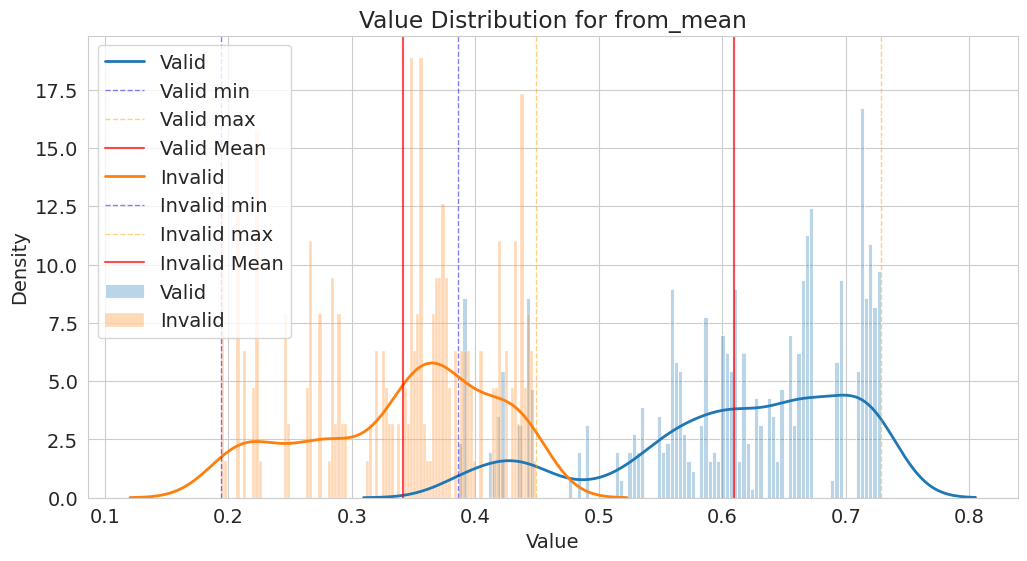

In [28]:
import seaborn as sb
# Create a dictionary to loop over the datasets
datasets = {
    'Valid': valid_ds,
    'Invalid': invalid_ds
}

# Calculate min, max, and mean for each dataset
stats = {}
for label, df in datasets.items():
    stats[label] = {
        'min': df[f'{corr_func}_from_mean'].min(),
        'max': df[f'{corr_func}_from_mean'].max(),
        'mean': df[f'{corr_func}_from_mean'].mean()
    }
    print(stats[label])

# Plot
plt.figure(figsize=(12, 6))
for label, df in datasets.items():
    sb.histplot(
        df[f'{corr_func}_from_mean'],
        bins=100,
        alpha=0.3,
        label=label,
        kde=False,
        stat='density'
    )
    sb.kdeplot(
        df[f'{corr_func}_from_mean'],
        label=label,
        linewidth=2
    )
    # Add vertical lines for min, max, and mean
    plt.axvline(stats[label]['min'], color='blue', linestyle='--', alpha=0.5, linewidth=1, label=f'{label} min')
    plt.axvline(stats[label]['max'], color='orange', linestyle='--', alpha=0.5, linewidth=1, label=f'{label} max')
    plt.axvline(stats[label]['mean'], color='red', linestyle='-', alpha=0.7, linewidth=1.5, label=f'{label} Mean')

plt.title('Value Distribution for from_mean')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()